In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 15.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=abe49d7d63b07d3516dbeb0370daa6a6dc2ac98ec9b6065a2e0da3ccde373494
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.639999999999999


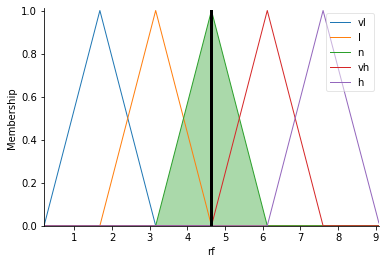

In [ ]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz

ws = ctrl.Antecedent(np.arange(0.7,3.2,0.6),'ws')
tp = ctrl.Antecedent(np.arange(20.4,41.2,5.2),'tp')
rf = ctrl.Consequent(np.arange(0.2,9.2,1.48),'rf')

ws['vl'] = fuzz.trimf(ws.universe,[0.7,0.7,1.3])  # theo các đỉnh hình tam giác ( do vẽ theo hình tam giác)
ws['l'] = fuzz.trimf(ws.universe,[0.7,1.3,1.9])
ws['n'] = fuzz.trimf(ws.universe,[1.3,1.9,2.5])
ws['h'] = fuzz.trimf(ws.universe,[1.9,2.5,3.1])
ws['vh'] = fuzz.trimf(ws.universe,[2.5,3.1,3.1])
#ws.view()

tp['vl'] = fuzz.trimf(tp.universe,[20.4,20.4,25.6])
tp['l'] = fuzz.trimf(tp.universe,[20.4,25.6,30.8])
tp['n'] = fuzz.trimf(tp.universe,[25.6,30.8,36])
tp['h'] = fuzz.trimf(tp.universe,[30.8,36,41.2])
tp['vh'] = fuzz.trimf(tp.universe,[36,41.2,41.2])
#tp.view()

rf['vl'] = fuzz.trimf(rf.universe,[0.2,1.68,3.16])
rf['l'] = fuzz.trimf(rf.universe,[1.68,3.16,4.64])
rf['n'] = fuzz.trimf(rf.universe,[3.16,4.64,6.12])
rf['vh'] = fuzz.trimf(rf.universe,[4.64,6.12,7.6])
rf['h'] = fuzz.trimf(rf.universe,[6.12,7.6,9.1])
#rf.view()

rule1 = ctrl.Rule(ws['vl'] & tp['vl'],rf['vl'])
rule2 = ctrl.Rule(ws['vl'] & tp['l'],rf['vl'])
rule3 = ctrl.Rule(ws['vl'] & tp['n'],rf['l'])
rule4 = ctrl.Rule(ws['vl'] & tp['h'],rf['l'])
rule5 = ctrl.Rule(ws['vl'] & tp['vh'],rf['n'])

rule6 = ctrl.Rule(ws['l'] & tp['vl'],rf['vl'])
rule7 = ctrl.Rule(ws['l'] & tp['l'],rf['vl'])
rule8 = ctrl.Rule(ws['l'] & tp['n'],rf['l'])
rule9 = ctrl.Rule(ws['l'] & tp['h'],rf['n'])
rule10 = ctrl.Rule(ws['l'] & tp['vh'],rf['h'])

rule11 = ctrl.Rule(ws['n'] & tp['vl'],rf['l'])
rule12 = ctrl.Rule(ws['n'] & tp['l'],rf['n'])
rule13 = ctrl.Rule(ws['n'] & tp['n'],rf['n'])
rule14 = ctrl.Rule(ws['n'] & tp['h'],rf['n'])
rule15 = ctrl.Rule(ws['n'] & tp['vh'],rf['h'])

rule16 = ctrl.Rule(ws['h'] & tp['vl'],rf['l'])
rule17 = ctrl.Rule(ws['h'] & tp['l'],rf['n'])
rule18 = ctrl.Rule(ws['h'] & tp['n'],rf['h'])
rule19 = ctrl.Rule(ws['h'] & tp['h'],rf['vh'])
rule20 = ctrl.Rule(ws['h'] & tp['vh'],rf['vh'])

rule21 = ctrl.Rule(ws['vh'] & tp['vl'],rf['n'])
rule22 = ctrl.Rule(ws['vh'] & tp['l'],rf['h'])
rule23 = ctrl.Rule(ws['vh'] & tp['n'],rf['h'])
rule24 = ctrl.Rule(ws['vh'] & tp['h'],rf['vh'])
rule25 = ctrl.Rule(ws['vh'] & tp['vh'],rf['vh'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['ws'] = 5.2
tipping.input['tp'] = 20
tipping.compute() 

print(tipping.output['rf']) 
rf.view(sim = tipping)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Salary_Data.csv')
data.head() # hiện dòng đầu
#data.Shape()  # hiện kích thước 

x = data.drop(['Salary'],axis = True)
y = data['Salary']



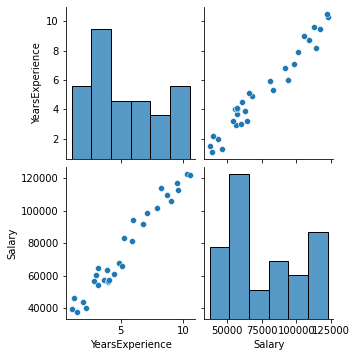

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x,y,test_size=0.2 , random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape
sns.pairplot(data)

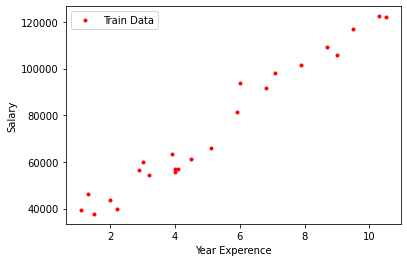

In [ ]:
plt.plot(x_train , y_train , 'r.' , label ='Train Data')
plt.xlabel('Year Experence')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test).round(1)
cal = pd.DataFrame(np.c_[y_test , y_pred],columns = ['Original Salary','Predicted Salary'])

print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(x_test,y_test))

Coeffient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9024461774180497


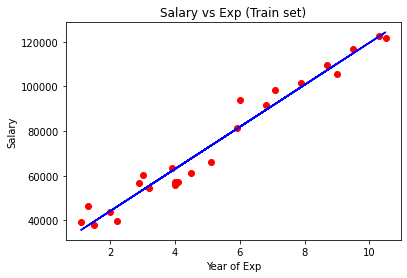

In [ ]:
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x_train , model.predict(x_train), color = 'blue')
plt.title('Salary vs Exp (Train set)')
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()